## **Links**

In [6]:
# https://gymnasium.farama.org/introduction/basic_usage/

## **Libraries**

In [13]:
import gymnasium as gym

## **All Environements**

In [21]:
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v1        CliffWalkingSlippery-v1
FrozenLake-v1          FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== None =====
Ant-v2                 Ant-v3                 GymV21Environment-v0
GymV26Environment-v0   HalfCheetah-v2         HalfCheetah-v3
Hopper-v2              Hopper-v3              Humanoid-v2
Humanoid-v3            HumanoidStandup-v2     InvertedDoublePendulum-v2
InvertedPendulum-v2    Pusher-v2              Reacher-v2
Swimmer-v2             Swimmer-v3             Walker2d-v2
Walker2d-v3
===== mujoco =====
Ant-v4    

#### Loading an Environment

In [ ]:
# Create a simple environment perfect for beginners
env = gym.make('CartPole-v1')

# The CartPole environment: balance a pole on a moving cart
# - Simple but not trivial
# - Fast training
# - Clear success/failure criteria

#### Details About the Environment

In [45]:
gym.spec('CartPole-v1')

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, disable_env_checker=False, kwargs={}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

## **CartPole-v1** --> No Agent / Reinforcement Learning Algorithm

### Run one episode ###

In [47]:
# Run `pip install "gymnasium[classic-control]"` for this example.
import gymnasium as gym

# Create our training environment - a cart with a pole that needs balancing
env = gym.make("CartPole-v1", render_mode="human")

# Reset environment to start a new episode
observation, info = env.reset()
# observation: what the agent can "see" - cart position, velocity, pole angle, etc.
# info: extra debugging information (usually not needed for basic learning)

print(f"Starting observation: {observation}")
# Example output: [ 0.01234567 -0.00987654  0.02345678  0.01456789]
# [cart_position, cart_velocity, pole_angle, pole_angular_velocity]

episode_over = False
total_reward = 0

while not episode_over:
    # Choose an action: 0 = push cart left, 1 = push cart right
    action = env.action_space.sample()  # Random action for now - real agents will be smarter!

    # Take the action and see what happens
    observation, reward, terminated, truncated, info = env.step(action)

    # reward: +1 for each step the pole stays upright
    # terminated: True if pole falls too far (agent failed)
    # truncated: True if we hit the time limit (500 steps)

    total_reward += reward
    episode_over = terminated or truncated

print(f"Episode finished! Total reward: {total_reward}")
env.close()

Starting observation: [ 0.01034128  0.01915979 -0.04996081  0.04981121]
Episode finished! Total reward: 21.0


### Run Multiple episode ###

In [ ]:
# Run `pip install "gymnasium[classic-control]"` for this example.
import gymnasium as gym

# Create our training environment - a cart with a pole that needs balancing
env = gym.make("CartPole-v1", render_mode="human") # render_mode=None Fastest for training. 

num_episodes = 20  # 🔹 run multiple episodes

for episode in range(num_episodes):
    # Reset environment to start a new episode
    observation, info = env.reset()
    print(f"\nEpisode {episode + 1} starting observation: {observation}")

    episode_over = False
    total_reward = 0

    while not episode_over:
        # Choose an action: 0 = push cart left, 1 = push cart right
        action = env.action_space.sample()  # Random action for now - real agents will be smarter!

        # Take the action and see what happens
        observation, reward, terminated, truncated, info = env.step(action)

        total_reward += reward
        episode_over = terminated or truncated

    print(f"Episode {episode + 1} finished! Total reward: {total_reward}")

env.close()



Episode 1 starting observation: [-0.0422439   0.00203498  0.01007657  0.01762012]
Episode 1 finished! Total reward: 19.0

Episode 2 starting observation: [ 0.0424217   0.0466012  -0.02559126  0.03505811]
Episode 2 finished! Total reward: 13.0

Episode 3 starting observation: [-0.01557675  0.00632884  0.02194342  0.02993113]
Episode 3 finished! Total reward: 11.0

Episode 4 starting observation: [ 0.04520863 -0.04902691  0.00866072 -0.01440084]
Episode 4 finished! Total reward: 14.0

Episode 5 starting observation: [ 0.04083452 -0.04254315  0.02250591 -0.02214292]
Episode 5 finished! Total reward: 21.0

Episode 6 starting observation: [0.0010304  0.01751008 0.04604509 0.01911255]
Episode 6 finished! Total reward: 10.0

Episode 7 starting observation: [ 0.03925148 -0.00691995 -0.03006944  0.04952499]
Episode 7 finished! Total reward: 23.0

Episode 8 starting observation: [-0.04645776  0.0202574  -0.03730197  0.02882828]
Episode 8 finished! Total reward: 52.0

Episode 9 starting observat

## **Training An Q-Learning Agent**

#### Building Q-Learning Agent --> BlackJack Game

In [73]:
from collections import defaultdict
import gymnasium as gym
import numpy as np


class BlackjackAgent:
    def __init__(
        self,
        env: gym.Env,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Q-Learning agent.

        Args:
            env: The training environment
            learning_rate: How quickly to update Q-values (0-1)
            initial_epsilon: Starting exploration rate (usually 1.0)
            epsilon_decay: How much to reduce epsilon each episode
            final_epsilon: Minimum exploration rate (usually 0.1)
            discount_factor: How much to value future rewards (0-1)
        """
        self.env = env

        # Q-table: maps (state, action) to expected reward
        # defaultdict automatically creates entries with zeros for new states
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor  # How much we care about future rewards

        # Exploration parameters
        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        # Track learning progress
        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """Choose an action using epsilon-greedy strategy.

        Returns:
            action: 0 (stand) or 1 (hit)
        """
        # With probability epsilon: explore (random action)
        if np.random.random() < self.epsilon:
            return self.env.action_space.sample()

        # With probability (1-epsilon): exploit (best known action)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Update Q-value based on experience.

        This is the heart of Q-learning: learn from (state, action, reward, next_state)
        """
        # What's the best we could do from the next state?
        # (Zero if episode terminated - no future rewards possible)
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])

        # What should the Q-value be? (Bellman equation)
        target = reward + self.discount_factor * future_q_value

        # How wrong was our current estimate?
        temporal_difference = target - self.q_values[obs][action]

        # Update our estimate in the direction of the error
        # Learning rate controls how big steps we take
        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )

        # Track learning progress (useful for debugging)
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        """Reduce exploration rate after each episode."""
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

#### Hyperparameters & Agent Initialization

In [81]:
# Training hyperparameters
learning_rate = 0.01        # How fast to learn (higher = faster but less stable)
n_episodes = 100_0000        # Number of hands to practice
start_epsilon = 1.0         # Start with 100% random actions
epsilon_decay = start_epsilon / (n_episodes / 2)  # Reduce exploration over time
final_epsilon = 0.1         # Always keep some exploration

# Create environment and agent
env = gym.make("Blackjack-v1", sab=False, render_mode="ansi")
env = gym.wrappers.RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = BlackjackAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

d:\SEM 5\ML\Package\venv\Lib\site-packages\gymnasium\envs\registration.py:728: UserWarning: WARN: The environment is being initialised with render_mode='ansi' that is not in the possible render_modes (['human', 'rgb_array']).
  logger.warn(


#### The Training Loop

In [82]:
from tqdm import tqdm  # Progress bar

for episode in tqdm(range(n_episodes)):
    # Start a new hand
    obs, info = env.reset()
    done = False

    # Play one complete hand
    while not done:
        # Agent chooses action (initially random, gradually more intelligent)
        action = agent.get_action(obs)

        # Take action and observe result
        next_obs, reward, terminated, truncated, info = env.step(action)

        # Learn from this experience
        agent.update(obs, action, reward, terminated, next_obs)

        # Move to next state
        done = terminated or truncated
        obs = next_obs

    # Reduce exploration rate (agent becomes less random over time)
    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [02:22<00:00, 7003.42it/s]


#### Analyzing Training Results

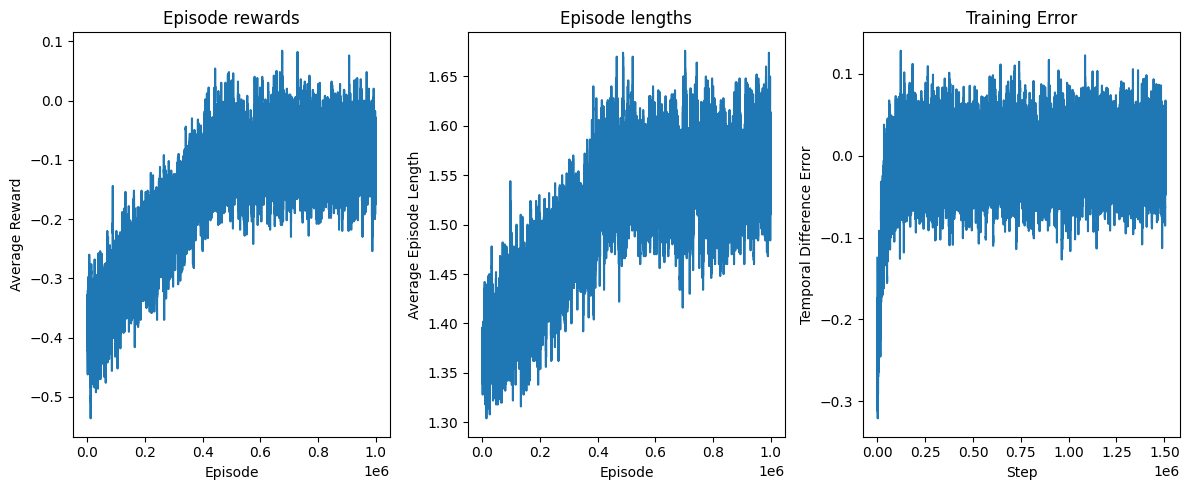

In [83]:
from matplotlib import pyplot as plt

def get_moving_avgs(arr, window, convolution_mode):
    """Compute moving average to smooth noisy data."""
    return np.convolve(
        np.array(arr).flatten(),
        np.ones(window),
        mode=convolution_mode
    ) / window

# Smooth over a 500-episode window
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

# Episode rewards (win/loss performance)
axs[0].set_title("Episode rewards")
reward_moving_average = get_moving_avgs(
    env.return_queue,
    rolling_length,
    "valid"
)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)
axs[0].set_ylabel("Average Reward")
axs[0].set_xlabel("Episode")

# Episode lengths (how many actions per hand)
axs[1].set_title("Episode lengths")
length_moving_average = get_moving_avgs(
    env.length_queue,
    rolling_length,
    "valid"
)
axs[1].plot(range(len(length_moving_average)), length_moving_average)
axs[1].set_ylabel("Average Episode Length")
axs[1].set_xlabel("Episode")

# Training error (how much we're still learning)
axs[2].set_title("Training Error")
training_error_moving_average = get_moving_avgs(
    agent.training_error,
    rolling_length,
    "same"
)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)
axs[2].set_ylabel("Temporal Difference Error")
axs[2].set_xlabel("Step")

plt.tight_layout()
plt.show()

#### Testing Your Trained Agent

In [91]:
# Test the trained agent
def test_agent(agent, env, num_episodes=1000):
    """Test agent performance without learning or exploration."""
    total_rewards = []

    # Temporarily disable exploration for testing
    old_epsilon = agent.epsilon
    agent.epsilon = 0.0  # Pure exploitation

    for _ in range(num_episodes):
        obs, info = env.reset()
        episode_reward = 0
        done = False

        while not done:
            action = agent.get_action(obs)
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward
            done = terminated or truncated

        total_rewards.append(episode_reward)

    # Restore original epsilon
    agent.epsilon = old_epsilon

    win_rate = np.mean(np.array(total_rewards) > 0)
    average_reward = np.mean(total_rewards)

    print(f"Test Results over {num_episodes} episodes:")
    print(f"Win Rate: {win_rate:.1%}")
    print(f"Average Reward: {average_reward:.3f}")
    print(f"Standard Deviation: {np.std(total_rewards):.3f}")

# Test your agent
test_agent(agent, env)

Test Results over 1000 episodes:
Win Rate: 45.6%
Average Reward: -0.007
Standard Deviation: 0.959
